In [ ]:
# importing the numpy package with the alias np
import numpy as np

# importing sequential model from keras.models
from keras.models import Sequential
# importing different layers and activations from keras.layers
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
# importing np_utils from keras.utils
from keras.utils import np_utils

# importing the mnist dataset from keras.datasets 
from keras.datasets import mnist

##Load pre-shuffled MNIST data into train and test sets

In [ ]:
# we are downloading the MNIST dataset and splitting the data for training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


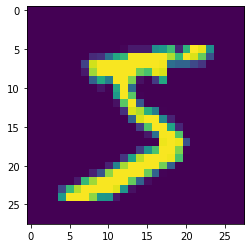

In [ ]:

# printing out the shape of x_train
print (X_train.shape)

# importing pyplot with alias plt from matplotlib package
from matplotlib import pyplot as plt
# %matplotlib inline is a magic function to show us the plots in a notebook
%matplotlib inline
# plotting the first image or the image at index zero in the training dataset
plt.imshow(X_train[0])

In [ ]:
#Reshaping our training and testing datatset using numpy's reshape function which we will feed to the model
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
#Doing type conversion or changing the datatype to float32 for the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Doing standardization or normalization here dividing each pixel by 255 in the train and test data
X_train /= 255
X_test /= 255

In [ ]:

#Checking first 10 image labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# simply we can say we are doing sort of onehot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:

# having a look in the first 10 datapoints after onehot encoding
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:

# importing Activation, BatchNormalization and MaxPooling2D from keras.layers for performing maxpooling and batchnormalizing operations and adding non linearity via activation functions
from keras.layers import Activation,BatchNormalization, Conv2D
# building our sequential model using the Sequential class and creating the model object
model = Sequential()
# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(28,28,1))) # channel dimensions = 26x26x10    and Receptive field = 3x3
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout        
model.add(Conv2D(16,  kernel_size=3, activation='relu'))                        # channel dimensions = 24x24x16    and Receptive field = 5x5
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed Maxpoooling operation
model.add(Conv2D(10, kernel_size=1, activation='relu')) #24                    # channel dimensions = 24x24x10    and Receptive field = 7x7 using 1x1 kernel
model.add(MaxPooling2D(pool_size=(2, 2)))#12                                 # channel dimensions = 12x12x10    and Receptive field = 14x14

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(16, kernel_size=3, activation='relu'))#10                     # channel dimensions = 10x10x16    and Receptive field = 16x16
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(16, kernel_size= 3, activation='relu'))#8                      # channel dimensions = 8x8x16    and Receptive field = 18x18
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(16, kernel_size=3, activation='relu'))#6                      # channel dimensions = 6x6x16    and Receptive field = 20x20
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(16, kernel_size=3, activation='relu'))#4                      # channel dimensions = 4x4x16    and Receptive field = 22x22
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
model.add(Conv2D(10, kernel_size=4))                                           # using 4x4 kernel to see the complete image

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model.add(Activation('softmax'))


In [ ]:
# Seeing the summary of the complete model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 10)       

In [ ]:
# We are importing the Adam Optimizer
from keras.optimizers import Adam

# We are importing the learningratescheduler callback
from keras.callbacks import LearningRateScheduler
#Creating the "scheduler" function with two arguments i.e learning rate and epoch
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.
469/469 [==============================] - 53s 10ms/step - loss: 0.4855 - accuracy: 0.8440 - val_loss: 0.1120 - val_accuracy: 0.9682
Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
469/469 [==============================] - 4s 9ms/step - loss: 0.0728 - accuracy: 0.9765 - val_loss: 0.0375 - val_accuracy: 0.9870
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
469/469 [==============================] - 4s 8ms/step - loss: 0.0519 - accuracy: 0.9835 - val_loss: 0.0513 - val_accuracy: 0.9836
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0015329586.
469/469 [==============================] - 4s 8ms/step - loss: 0.0408 - accuracy: 0.9869 - val_loss: 0.0294 - val_accuracy: 0.9909
Epoch 5/20

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0013181019.
469/469 [==============================] - 4s 

In [ ]:
# Here we are evaluating our model using the test data and saving the results in score variable
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
score

[0.019399410113692284, 0.9941999912261963]

In [ ]:

from keras.layers import Activation,BatchNormalization, Conv2D

model = Sequential()

model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(28,28,1))) # 26x26x10  
model.add(BatchNormalization())
 
model.add(Conv2D(16,  kernel_size=3, activation='relu')) # 24x24x16  
model.add(MaxPooling2D(pool_size=(2, 2)))#12x12x16

model.add(Conv2D(16,  kernel_size=3, activation='relu'))# 10x10x16
model.add(MaxPooling2D(pool_size=(2, 2)))#5x5x16

model.add(Conv2D(16,  kernel_size=3, activation='relu'))    #3x3x16
model.add(BatchNormalization())
model.add(Conv2D(10, kernel_size=3))          #1x1x16                        

model.add(Flatten())

model.add(Activation('softmax'))

# Seeing the summary of the complete model
model.summary()